<center><h1>Resolución de un caso práctico sobre regresión</h1></center>

Se considera estudiar los datos disponibles y generar un modelo que permita predecir el número de bicicletas se alquilarán al día (variable cnt: recuento total de bicicletas alquiladas) en función de diferentes variables. Se dispone de información sobre: fecha, estación, año, mes, día, hora,  si el día de clima es de vacaciones, día de la semana, si el día es laborable, clima, temperatura, sensación térmica, humedad, velocidad del viento,  usuarios casuales y usuarios registrados. 

Se procede al analisis de los datos, creación del modelo, prueba, evaluación y extracción de conclusiones.



In [156]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.formula.api as sfm  

In [157]:
datos=pd.read_csv("https://raw.githubusercontent.com/Jolombart/Actividad3AA/main/day.csv")
 

## Descripción y análisis de los datos

In [158]:
datos.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [159]:
datos.shape

(731, 16)

Tenemos 731 registros y 16 atributos, uno de ellos será la variable dependiente $(cnt)$

### Descripción de los atributos 
Todos los atributos, salvo la fecha se han reducido o normalizado

#### Atributos que no se tendrán en cuenta inicialmente porque no se considera que aporten información para el análisis

- instant: identificador índice único de la tabla $( Cuantitativo $ $ discreto )$
- dteday : Fecha $( Cualitativo  )$
- yr : Año $( Cuantitativo $ $ discreto )$
    - 0: 2011
    - 1: 2012


#### Variables independientes:

- season : Estación  $( Cuantitativo $ $ discreto )$
    - 1: invierno 
    - 2: primavera 
    - 3: verano 
    - 4: otoño
- mnth : Mes (1 to 12) $( Cuantitativo $ $ discreto )$
- holiday :  $( Binario/Booleano )$
    - 1: día de vacaciones
    - 0: no 
- weekday : Día de la semana (1 a 7)  $( Cuantitativo $ $ discreto )$
- workingday :  $( Binario/Booleano )$
    - 1: laborable
    - 0: festivo o fin de semana
+ weathersit : $( Cuantitativo $ $ discreto )$
    - 1: Despejado, Pocas nubes, Parcialmente nublado, Parcialmente nublado
    - 2: Niebla + Nublado, Niebla + Nubes rotas, Niebla + Pocas nubes, Niebla
    - 3: Nieve ligera, Lluvia ligera + Tormenta + Nubes dispersas, Lluvia ligera + Nubes dispersas
    - 4: Lluvia intensa + Paletas de hielo + Tormenta + Niebla, Nieve + Niebla
- temp : Temperatura normalizada (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (solo escala horaria) $( Cuantitativo $ $ continuo )$
- atemp: sensación térmica normalizada grados Celsius, (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 $( Cuantitativo $ $ continuo )$
- hum: Humedad normalizada. Los valores se dividen entre cien 100 (max) $( Cuantitativo $ $ continuo )$
- windspeed: Velocidad del viento normalizada. Los valores se dividen entre 67 (max) $( Cuantitativo $ $ continuo )$

#### Variables Dependientes: $( Cuantitativo $ $ continuo )$
- casual: Recuento de usuarios ocasionales. Es un subconjunto de cnt
- registered: Recuento de usuarios registrados. Es un subconjunto de cnt
- cnt: Recuento del total de bicicletas alquiladas, incluidas las casuales y las registradas, es la suma de 'casual' y 'registered'

##### Se considerará una única variable dependiente que será el recuento total, cnt.


In [160]:
datos.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

##### No hay datos nulos que haya que tratar.

In [161]:
datos.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Esta descripción estadística de los datos es interesante, nos da idea de la distribución de loa datos.

##### Número de bicicletas alquiladas

- Máximo: 8714.000
- Mínimo: 22.000
- Media: 4504.348837
- Desviación típica:  1937.211452
- Valores más comunes: 4548, 5956


Hay columnas que no interesan: 
* <b>[instant]</b>: El índice no aporta nada.
* <b>[dteday]</b>: Datos con valor texto que no se puede analizar a no ser que se trate. Tampoco es una información útil para hacer predicciones.
* <b>[yr]</b>: El año no es interesante para el estudio, no aporta información interesante para hacer predicciones.
* <b>[casual] y [registrered]</b>: Pueden ser elegidas variables dependientes por sí mismas; [cnt] es la suma de [casual] y [registrered], pero lo que buscamos en esta ocasión es el global [cnt], por tanto debemos quitarlas ya que la correlación sería del 100% restando toda influencia al resto de las variables.
* <b>[temp] y [atemp]</b>: La temperatura y la sensación térmica son redundantes, por tanto se considera únicamente la sensación térmica <b>[atemp]</b>: .

#### Se observa la correlacion de los datos:

In [162]:
datos.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


Se da la circunstancia de que muchas variables tienen una correlación muy baja. Dada esta descripción de relación entre atributos, no tendremos en cuenta los atributos con correlación cercana a 0.00. Así que eliminaremos, holiday, weekday, workingday.

## Tratamiento de los datos

- No hay datos nulos que haya que tratar.
- Se eliminan las columnas que después del análisis se ha decidido no tener en cuenta por no ser de interés

### Variables de interés

In [163]:
# Se eliminan la columnas no necesarias

#Por no aportar información valiosa
del datos["instant"]
del datos["dteday"]
del datos["yr"]

#No son independientes
del datos["casual"]
del datos["registered"]

#Por ser redundante:
del datos["temp"] 

#Por no tener suficiente correlación
del datos["holiday"]
del datos["weekday"]
del datos["workingday"]
del datos["hum"]

datos.head(10)

,season,mnth,weathersit,atemp,windspeed,cnt
0,1,1,2,0.363625,0.160446,985
1,1,1,2,0.353739,0.248539,801
2,1,1,1,0.189405,0.248309,1349
3,1,1,1,0.212122,0.160296,1562
4,1,1,1,0.229270,0.186900,1600
5,1,1,1,0.233209,0.089565,1606
6,1,1,2,0.208839,0.168726,1510
7,1,1,2,0.162254,0.266804,959
8,1,1,1,0.116175,0.361950,822
9,1,1,1,0.150888,0.223267,1321


In [164]:
datos.corr()

,season,mnth,weathersit,atemp,windspeed,cnt
season,1.000000,0.831440,0.019211,0.342876,-0.229046,0.406100
mnth,0.831440,1.000000,0.043528,0.227459,-0.207502,0.279977
weathersit,0.019211,0.043528,1.000000,-0.121583,0.039511,-0.297391
atemp,0.342876,0.227459,-0.121583,1.000000,-0.183643,0.631066
windspeed,-0.229046,-0.207502,0.039511,-0.183643,1.000000,-0.234545
cnt,0.406100,0.279977,-0.297391,0.631066,-0.234545,1.000000


## Elección, Justificación y aplicación de la técnica elegida 

Se ha decidido realizar un modelo de regresión linear múltiple, ya que hay varias variables a un nivel suficiente de correlación que a priori parecen interesantes y con capacidad para influir en la predicción del número de bicicletas alquiladas.

In [165]:
season= datos['season'].values
mnth= datos['mnth'].values
weathersit= datos['weathersit'].values
atemp = datos['atemp'].values
windspeed = datos['windspeed'].values
cnt = datos['cnt'].values


X = np.array([season,mnth,weathersit,atemp,windspeed]).T
y = np.array(cnt)

La variable $X$ contiene las variables independientes y la $y$ contiene la variable dependiente

In [166]:
#Entrenamiento con un 80% y test con el 20% restante.
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 0)
modelo = LinearRegression()   
#creamos el modelo con el conjunto de datos de entrenamiento
modelo.fit(X_train, y_train)


LinearRegression()

#### Prueba del modelo

In [167]:
y_pred = modelo.predict(X_test)
df = pd.DataFrame({'Real Test': y_test, 'Predicción': y_pred})
df.sample(15)

,Real Test,Predicción
7,6234,5429.274311
132,1450,2501.923018
68,6536,5644.291802
138,4985,5924.974074
123,2294,3702.769335
17,6536,5134.905996
5,1817,3810.355485
23,4460,5705.024281
86,4792,6122.348675
82,5362,6300.554586


## Evaluación de los Resultados Obtenidos

Se observa que hay grandes diferencias absolutas entre las predicciones y los valores reales.

In [168]:
y_pred = modelo.predict(X_test)
df = pd.DataFrame({'Real Test': y_test, 'Predicción': y_pred, 'Diferencia': y_pred - y_test})
df.sample(15)

,Real Test,Predicción,Diferencia
107,7415,5369.833562,-2045.166438
138,4985,5924.974074,939.974074
45,7436,5656.195025,-1779.804975
90,1263,1989.279175,726.279175
122,2927,4341.771581,1414.771581
41,801,2687.566527,1886.566527
52,5572,3851.572608,-1720.427392
65,1996,4101.823988,2105.823988
136,7132,5186.336340,-1945.663660
37,4840,7095.292948,2255.292948


Con poca variación de las entradas la incidencia en la variación del resultado es muy alta

In [169]:
c=[['season','mnth','weathersit','atemp','windspeed']]
coeff_df = pd.DataFrame(modelo.coef_, c,  columns=['Coefficient'])  
coeff_df

,Coefficient
season,423.878369
mnth,-27.014716
weathersit,-747.202285
atemp,6147.574274
windspeed,-2367.829811


La variable atemp influye mucho aumentando el resultado, su correlación además es la más alta del set  y windspeed es el que mas influye dismninuyendo el resultado

#### Comparando los valores reales con los previstos  

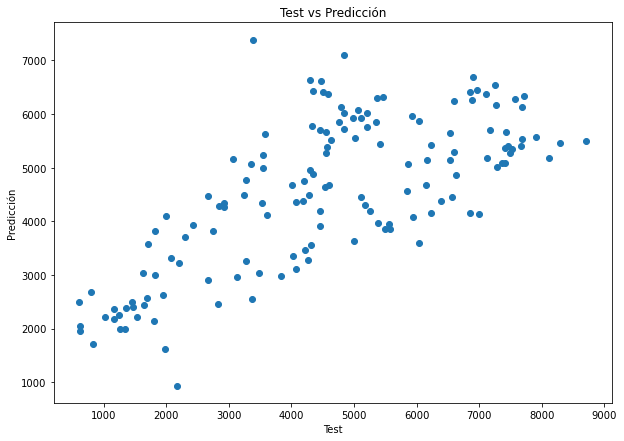

In [170]:
df1 = pd.DataFrame({'Test': y_test, 'Predicción': y_pred })
plt.figure(figsize=(10,7))
plt.scatter(y_test , y_pred)
plt.ylabel("Predicción")
plt.xlabel("Test")
plt.title("Test vs Predicción") 
plt.show()


La dispersión es bastante alta, hay considerables diferencia entre lo valores reales y los de test. No es un buen modelo. Los puntos deberían esta mas agrupados en torno a una línea, indicaría menos error entre la predicción y el valor real.

#### Calulamos los ratios de evaluación de modelos

In [171]:
prediccion_entrenamiento = modelo.predict(X_test)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
r2 = modelo.score(X_test, y_test)
print('Coeficiente de Determinación R2 = ' + str(r2))
mae = mean_absolute_error (y_test, y_pred)
print('Error absoluto medio = ' + str(mae))
 

Error Cuadrático Medio (MSE) = 2085105.9649237904
Raíz del Error Cuadrático Medio (RMSE) = 1443.9896000054123
Coeficiente de Determinación R2 = 0.5097493663829651
Error absoluto medio = 1246.281304627896


## Conclusiones

Se ha demostrado que la relación entre las variables dependientes seleccionadas y la variable objetivo existe, pero no es muy fuerte, y también se ha comprobado en la evaluación del modelo, que no es muy fiable. Sería necesario tener más datos y/o realizar ajustes para mejorar los resultados. Con éste modelo no se pueden hacer predicciones razonablemente buenas.

Gracias por leer mi trabajo

$\ \ Jaime\ César\ Orozco\ Lombart $